In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Exploratory Data Analysis

In [5]:
df.shape

(10000, 10)

In [6]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
df.duplicated().sum()

0

No null and duplicated values found in data 

In [11]:
df1 = df.copy()

In [12]:
df1.drop(['UDI','Product ID'], axis=1, inplace=True)

In [13]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
df1.rename(columns={'Type':'type', 'Air temperature [K]':'air_temp', 
                    'Process temperature [K]':'process_temp', 'Rotational speed [rpm]':'rotational_speed',
                   'Torque [Nm]': 'torque', 'Tool wear [min]':'tool_wear', 'Target':'failure', 
                    'Failure Type':'failure_type'}, inplace=True)

In [15]:
df1.columns

Index(['type', 'air_temp', 'process_temp', 'rotational_speed', 'torque',
       'tool_wear', 'failure', 'failure_type'],
      dtype='object')

In [16]:
print('Column Name : Number of Unique Values')
for col in df1.columns:
    print(f'{col} : {len(df1[col].unique())}')

Column Name : Number of Unique Values
type : 3
air_temp : 93
process_temp : 82
rotational_speed : 941
torque : 577
tool_wear : 246
failure : 2
failure_type : 6


0 means no failure and 1 means failure in the failure column

In [17]:
target_unmapped = {0:'No Failure', 1:'Failure'}
df1['failure'] = df1['failure'].map(target_unmapped)

In [18]:
df1.head()

,type,air_temp,process_temp,rotational_speed,torque,tool_wear,failure,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure,No Failure


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

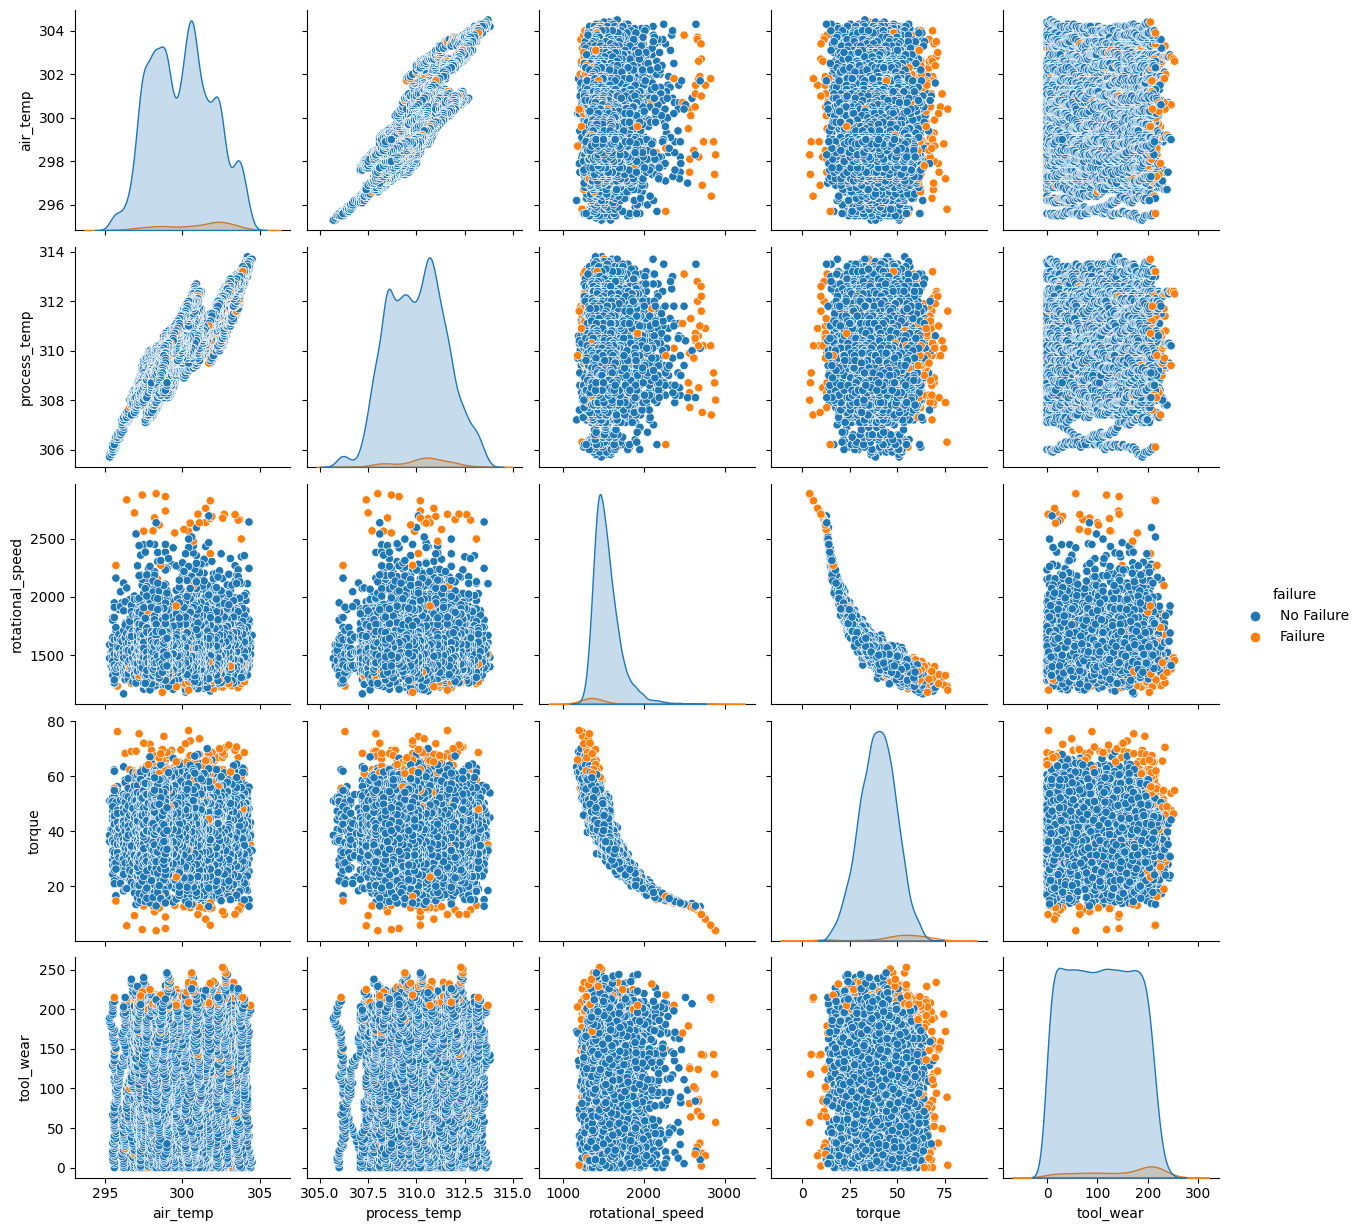

In [19]:
sns.pairplot(df1, hue='failure')

In [20]:
df1.columns

Index(['type', 'air_temp', 'process_temp', 'rotational_speed', 'torque',
       'tool_wear', 'failure', 'failure_type'],
      dtype='object')

In [21]:
categorical_cols = []
numerical_cols = []
for col in df1.columns:
    if df1[col].dtype == object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [22]:
categorical_cols

['type', 'failure', 'failure_type']

In [23]:
numerical_cols

['air_temp', 'process_temp', 'rotational_speed', 'torque', 'tool_wear']

In [24]:
df1['type'].value_counts()

type
L    6000
M    2997
H    1003
Name: count, dtype: int64

representing different product quality levels.

In [25]:
idx_amb = df1[(df1['failure'] == 'Failure') & (df1['failure_type'] == 'No Failure')].index

In [26]:
df1 = df1.drop(idx_amb, axis=0)
df1.shape

(9991, 8)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

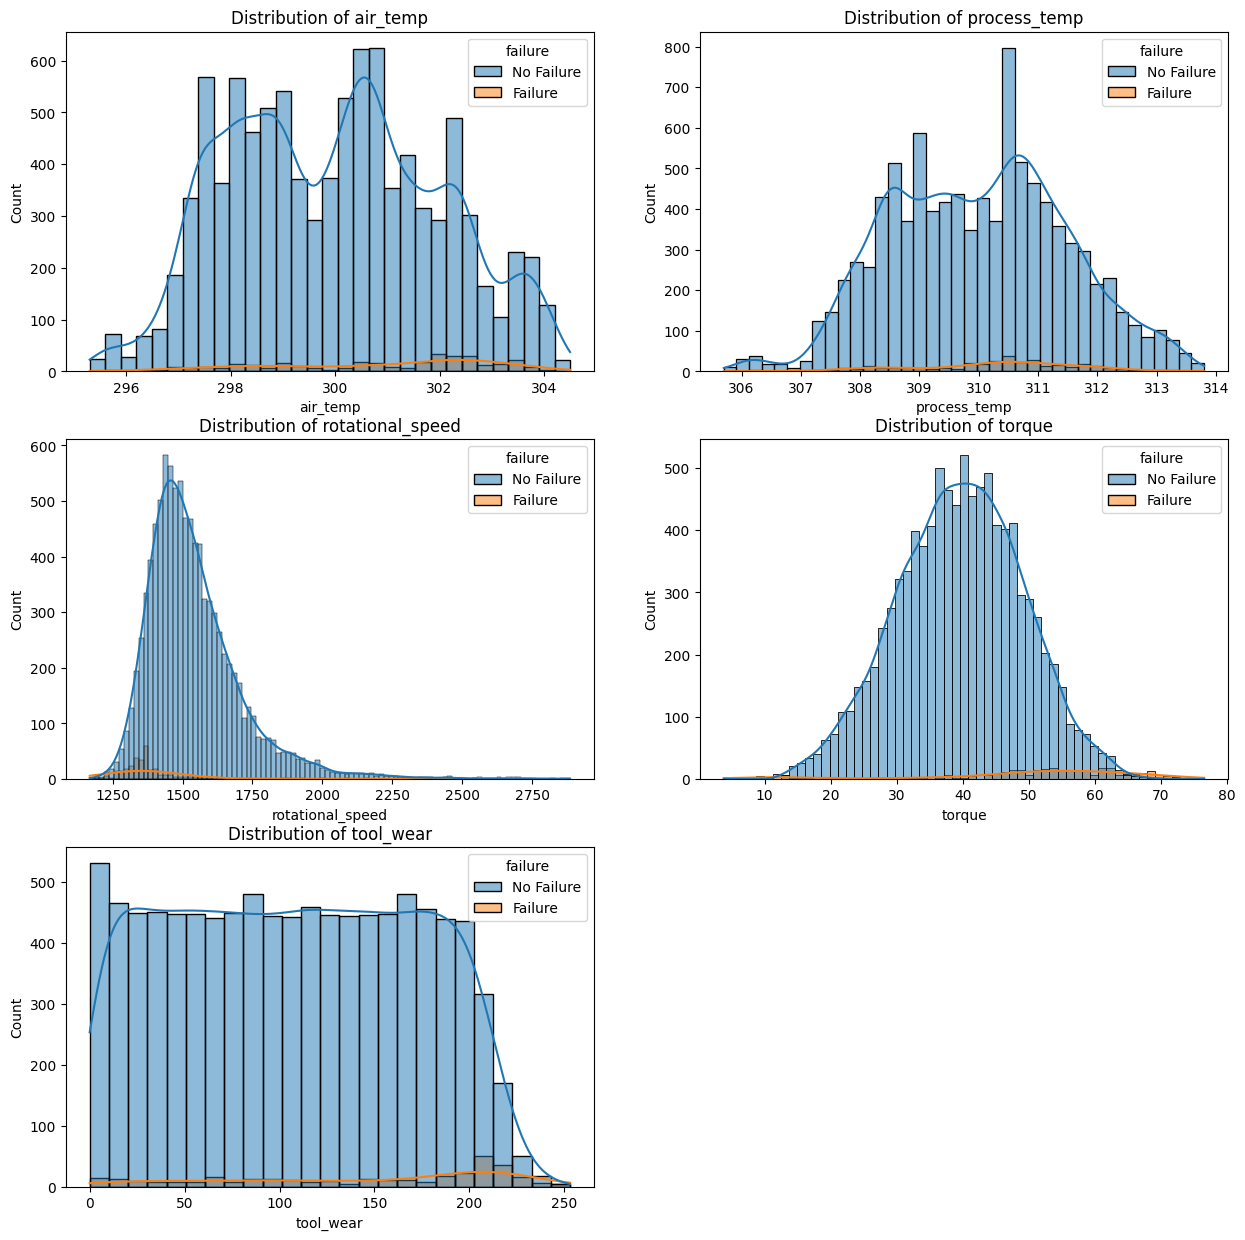

In [27]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df1, x=col, hue='failure', kde=True)
    plt.title(f'Distribution of {col}')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

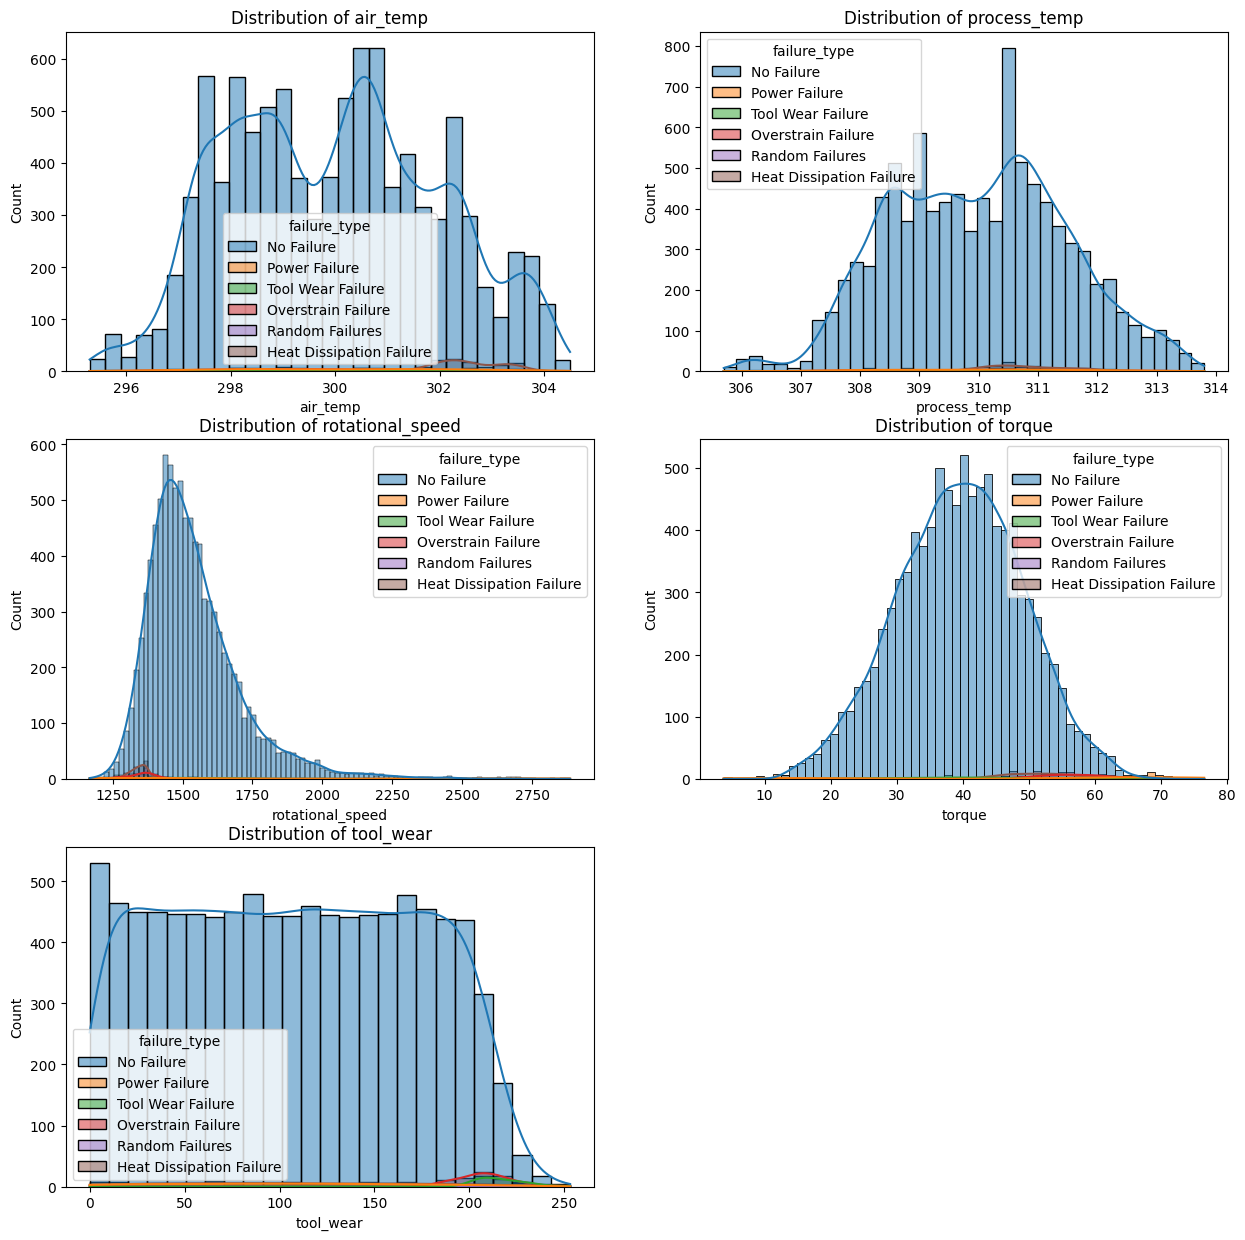

In [28]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df1, x=col, hue='failure_type', kde=True)
    plt.title(f'Distribution of {col}')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

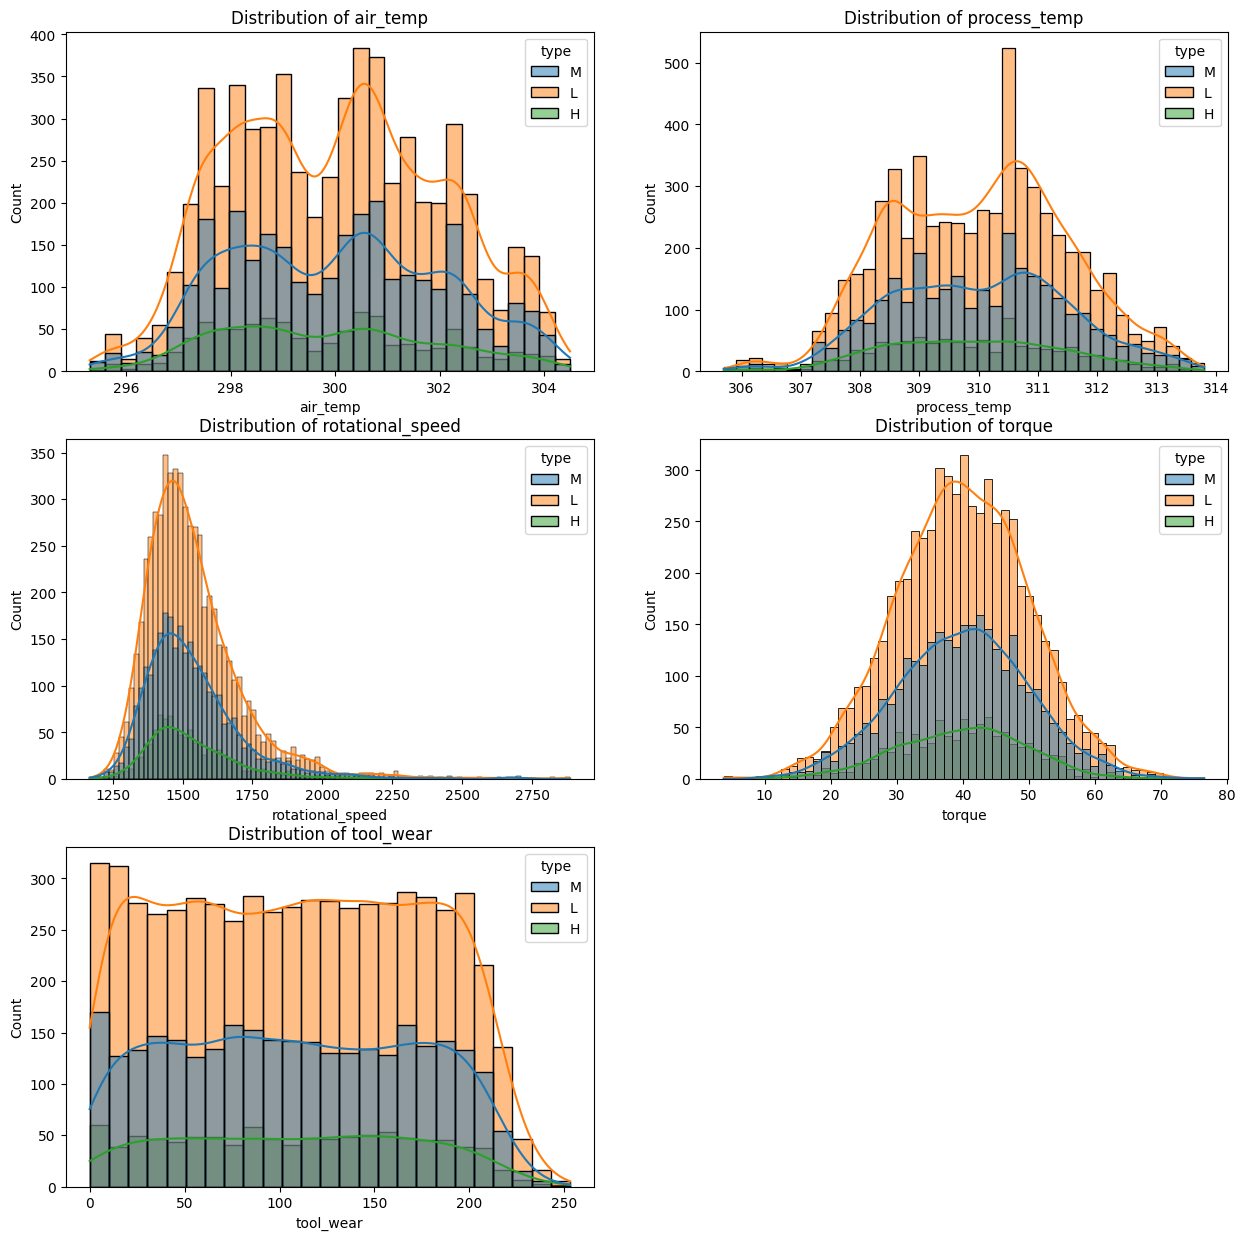

In [29]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df1, x=col, hue='type', kde=True)
    plt.title(f'Distribution of {col}')

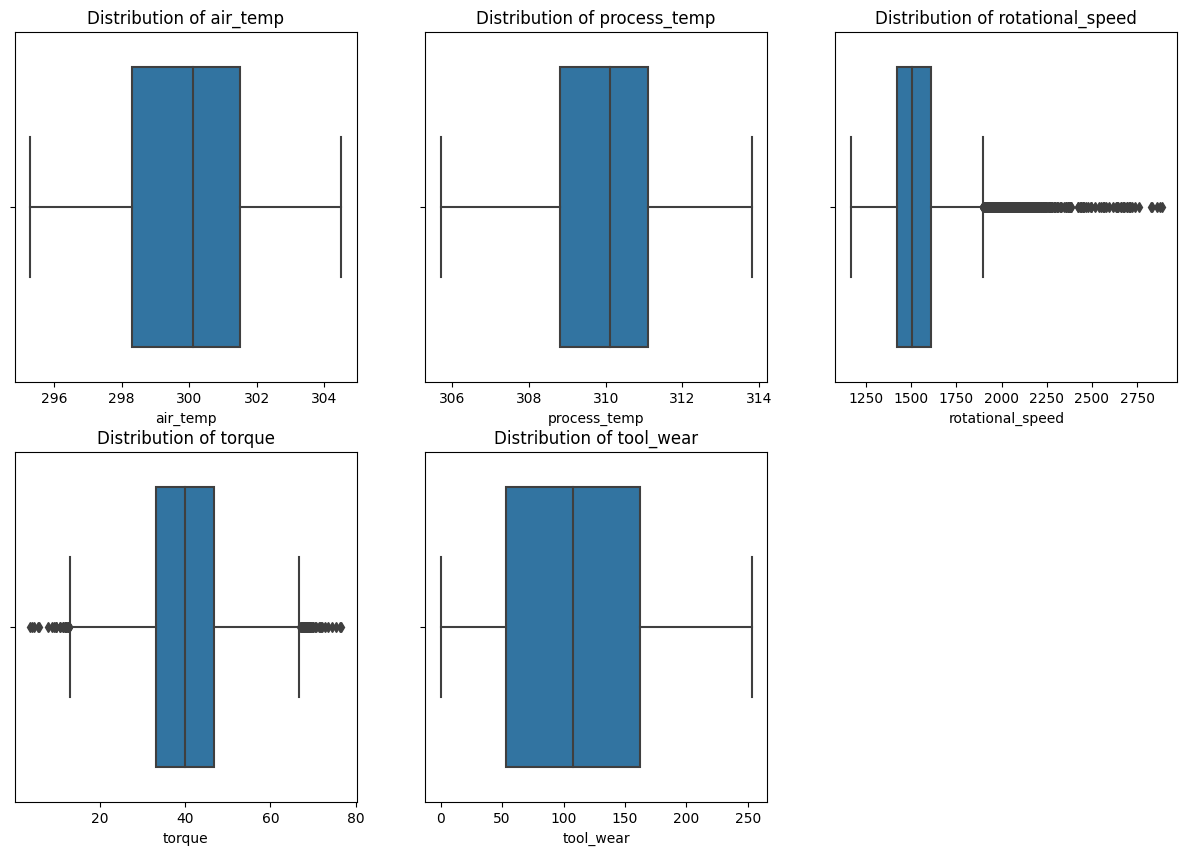

In [30]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(data = df1, x=col, hue='type')
    plt.title(f'Distribution of {col}')

Observation:
- The Rotational Speed feature shows a right-skewed distribution with many extreme values on the higher side. The box plot also reveals a significant number of outliers. These outliers might indicate sensor anomalies or unusual machine behavior before failure.

- The Torque feature has outliers on both sides, meaning there are extreme low and high values. These outliers could be crucial as they might represent stress conditions leading to equipment failure.

In [31]:
df_failed = df1[df1['failure'] == 'Failure']
df_failed.shape

(330, 8)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

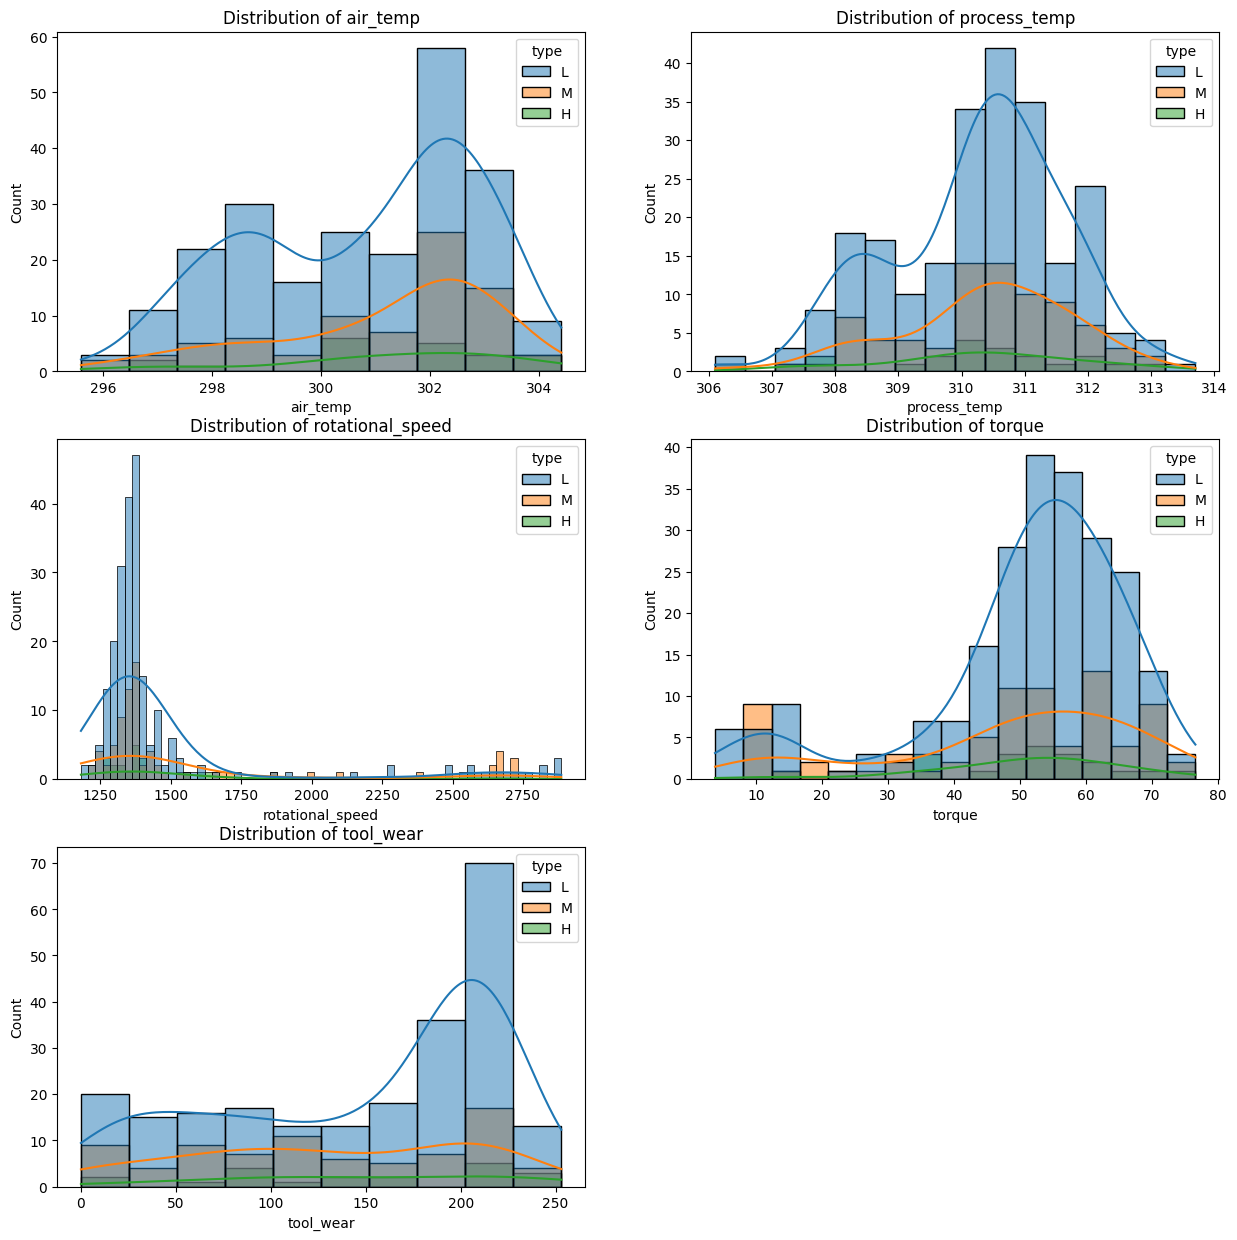

In [32]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df_failed, x=col, hue='type', kde=True)
    plt.title(f'Distribution of {col}')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

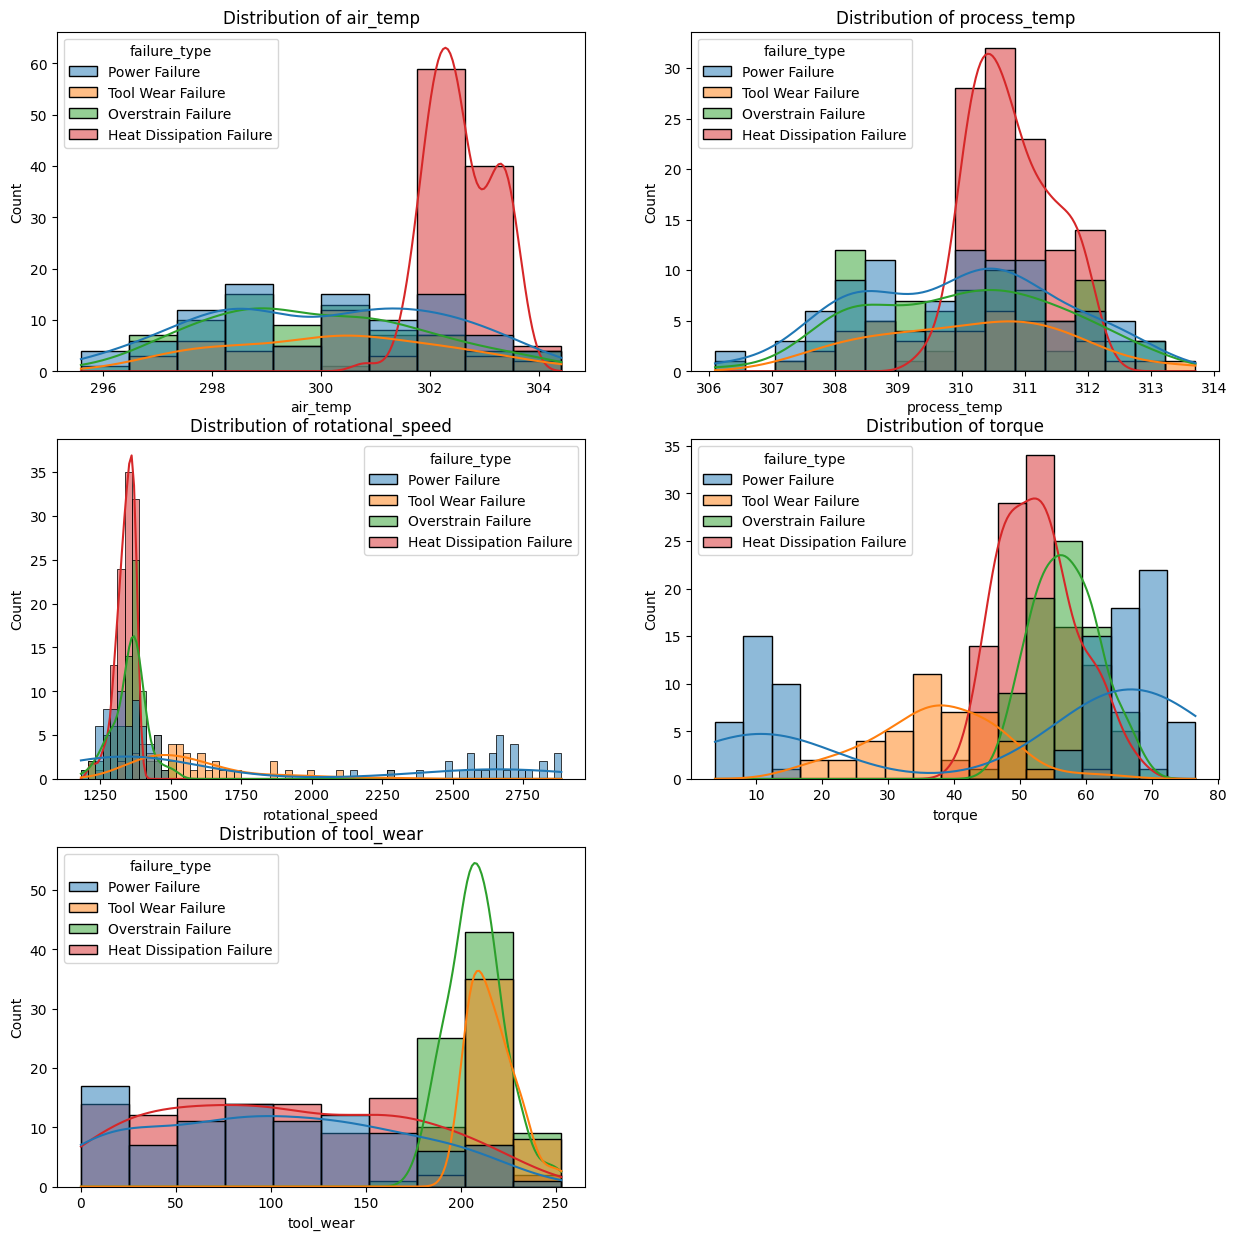

In [33]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df_failed, x=col, hue='failure_type', kde=True)
    plt.title(f'Distribution of {col}')

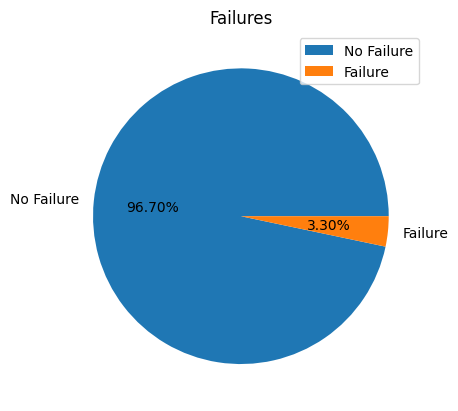

In [34]:
plt.pie(df1['failure'].value_counts(), labels = df1['failure'].value_counts().index, autopct='%1.2f%%')
plt.title('Failures')
plt.legend()
plt.show()

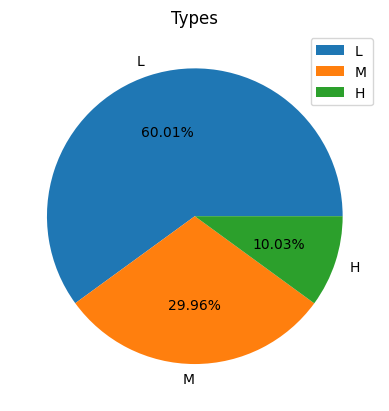

In [35]:
plt.pie(df1['type'].value_counts(), labels = df1['type'].value_counts().index, autopct='%1.2f%%')
plt.title('Types')
plt.legend()
plt.show()

<Axes: xlabel='failure_type'>

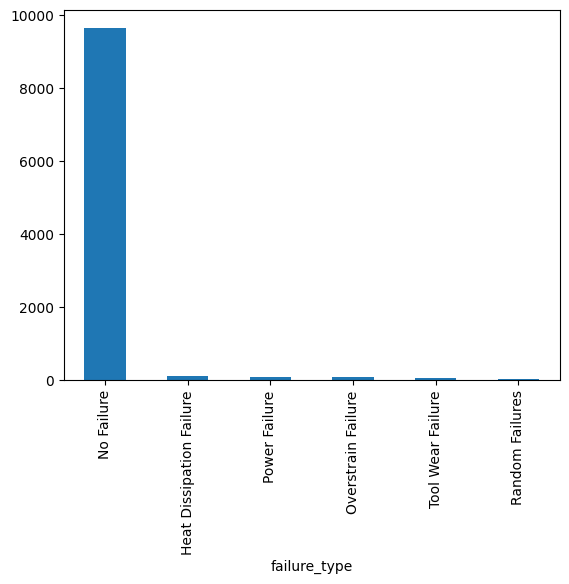

In [36]:
df1['failure_type'].value_counts().plot(kind='bar')

In [37]:
df1['failure_type'].value_counts()

failure_type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [38]:
random_index = df1[df1['failure_type']=='Random Failures'].index
random_index

Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509, 5553,
       5639, 6091, 6913, 6960, 7488, 7868],
      dtype='int64')

In [39]:
df1 = df1.drop(random_index, axis=0)
df1['failure_type'].value_counts()

failure_type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64

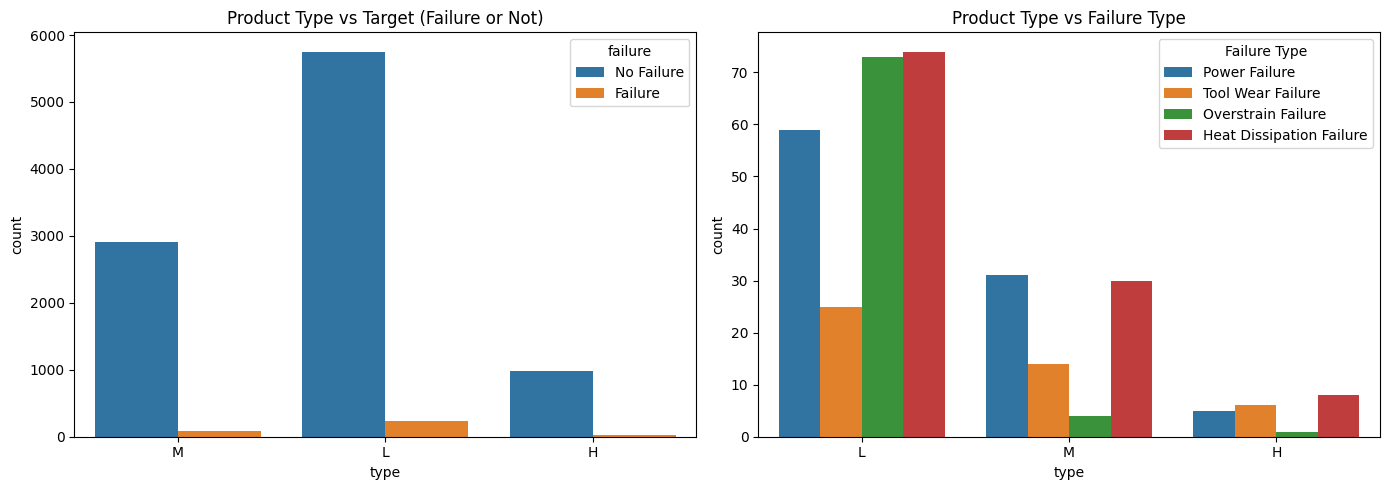

In [40]:
plt.figure(figsize=(14, 5))

# Count plot for Type vs Target
plt.subplot(1,2,1)
sns.countplot(data=df1, x='type', hue='failure')
plt.title('Product Type vs Target (Failure or Not)')
plt.legend(title='failure', labels=['No Failure', 'Failure'])

# Count plot for Type vs Failure Type (only failed cases)
plt.subplot(1,2,2)
sns.countplot(data=df_failed, x='type', hue='failure_type')
plt.title('Product Type vs Failure Type')
plt.legend(title='Failure Type')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [41]:
df2 =df1.copy()

#### Encoding Categorical features

In [42]:
print('Column Name : Unique Values')
for col in categorical_cols:
    print(f'{col} : {df2[col].unique()}')

Column Name : Unique Values
type : ['M' 'L' 'H']
failure : ['No Failure' 'Failure']
failure_type : ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Heat Dissipation Failure']


In [43]:
type_mapped = {'L': 0, 'M': 1, 'H': 2}
failure_type_mapped = {'No Failure': 0, 'Power Failure': 1, 'Overstrain Failure': 2, 
                       'Heat Dissipation Failure': 3, 'Tool Wear Failure': 4}
failure_mapped = {'No Failure':0, 'Failure':1}

In [44]:
df2['type'] = df2['type'].map(type_mapped)
df2['failure_type'] = df2['failure_type'].map(failure_type_mapped)
df2['failure'] = df2['failure'].map(failure_mapped)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9973 non-null   int64  
 1   air_temp          9973 non-null   float64
 2   process_temp      9973 non-null   float64
 3   rotational_speed  9973 non-null   int64  
 4   torque            9973 non-null   float64
 5   tool_wear         9973 non-null   int64  
 6   failure           9973 non-null   int64  
 7   failure_type      9973 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 701.2 KB


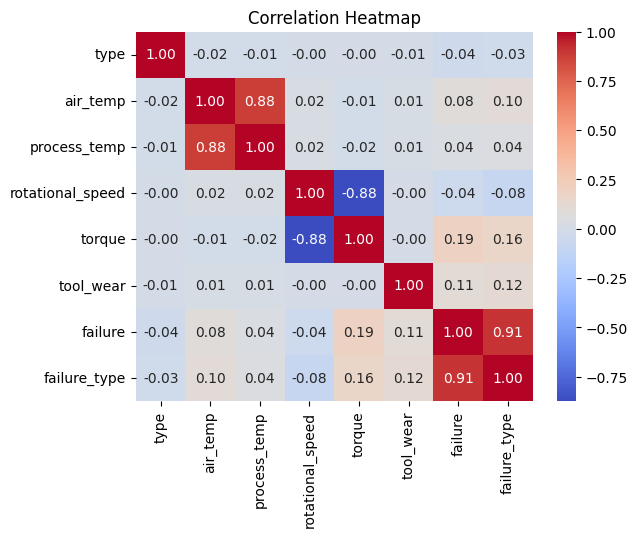

In [46]:
sns.heatmap(df2.corr(), annot=True, fmt='0.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Analysis of the Correlation Heatmap

##### A. Strong Positive Correlation (Red)
- **Process Temperature and Air Temperature (0.88)**
  - As air temperature increases, process temperature also increases.
  - This makes sense because the process temperature depends on the surrounding air.
  
- **Failure Type and Target (0.91)**
  - This is expected because Target represents machine failure (1 = Failure, 0 = No Failure), and Failure Type categorizes those failures.
  - A machine can only have a failure type if it has failed (Target = 1).

##### B. Strong Negative Correlation (Blue)
- **Torque and Rotational Speed (-0.88)**
  - When the rotational speed increases, torque decreases, which aligns with physics principles.
  - High-speed machines usually require less torque to maintain motion.

##### C. Medium Correlations (0.1 to 0.2)
- **Tool Wear and Target (0.12)**
  - Tool wear has a weak positive correlation with Target.
  - This means tool wear may contribute to failures, but it’s not the only factor.
  - Further analysis is needed to confirm its direct impact.

- **Torque and Target (0.19)**
  - A slight correlation suggests torque may play a role in machine failures, but other factors contribute as well.

##### D. Low or No Correlation (Close to 0)
- **Type**
  - Type has almost no correlation with other features.
  - This suggests that machine type does not significantly impact failures or sensor readings.
  - We might want to check if this feature is truly important for modeling.


### Applying SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df2.drop(['failure', 'failure_type'], axis=1)
y = df2['failure']

# Step 2: Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X_train, Y_train)

# Step 4: Check class distribution before and after SMOTE
print("Original class distribution:", dict(zip(*np.unique(Y_train, return_counts=True))))
print("Resampled class distribution:", dict(zip(*np.unique(Y_res, return_counts=True))))

Original class distribution: {0: 6740, 1: 241}
Resampled class distribution: {0: 6740, 1: 6740}


In [48]:
X_res.describe()

,type,air_temp,process_temp,rotational_speed,torque,tool_wear
count,13480.000000,13480.000000,13480.000000,13480.000000,13480.000000,13480.000000
mean,0.327671,300.447179,310.150055,1512.242804,45.020492,127.631157
std,0.573785,1.942291,1.333520,286.218180,13.866249,69.631244
min,0.000000,295.300000,305.700000,1192.000000,4.200000,0.000000
25%,0.000000,298.900000,309.200000,1355.000000,36.000000,67.000000
50%,0.000000,300.600000,310.311513,1424.000000,46.634407,132.000000
75%,1.000000,302.154927,311.023597,1563.000000,55.229024,194.000000
max,2.000000,304.500000,313.800000,2874.000000,75.400000,253.000000


In [49]:
X_res

,type,air_temp,process_temp,rotational_speed,torque,tool_wear
0,0,301.500000,311.100000,1458,41.400000,123
1,0,303.400000,312.700000,1363,45.500000,26
2,0,297.400000,308.400000,1571,39.400000,0
3,2,304.200000,313.500000,1546,41.400000,58
4,0,304.200000,313.400000,1434,42.500000,175
...,...,...,...,...,...,...
13475,1,300.548598,310.385976,1397,46.944849,212
13476,1,302.275381,311.064885,1336,62.224813,0
13477,0,302.236946,310.550739,1333,52.879804,157
13478,0,300.011112,309.858860,1435,41.287390,213


In [51]:
Y_res

0        0
1        0
2        0
3        0
4        0
        ..
13475    1
13476    1
13477    1
13478    1
13479    1
Name: failure, Length: 13480, dtype: int64

In [52]:
numerical_cols

['air_temp', 'process_temp', 'rotational_speed', 'torque', 'tool_wear']

### Scaling Data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])

In [54]:
X_res.describe().round(2)

,type,air_temp,process_temp,rotational_speed,torque,tool_wear
count,13480.00,13480.00,13480.00,13480.00,13480.00,13480.00
mean,0.33,-0.00,0.00,0.00,-0.00,-0.00
std,0.57,1.00,1.00,1.00,1.00,1.00
min,0.00,-2.65,-3.34,-1.12,-2.94,-1.83
25%,0.00,-0.80,-0.71,-0.55,-0.65,-0.87
50%,0.00,0.08,0.12,-0.31,0.12,0.06
75%,1.00,0.88,0.66,0.18,0.74,0.95
max,2.00,2.09,2.74,4.76,2.19,1.80


In [55]:
features = X_res[['process_temp', 'rotational_speed', 'tool_wear']]
target = Y_res

In [56]:
features

,process_temp,rotational_speed,tool_wear
0,0.712386,-0.189523,-0.066512
1,1.912262,-0.521450,-1.459617
2,-1.312406,0.205296,-1.833026
3,2.512200,0.117947,-1.000036
4,2.437208,-0.273378,0.680307
...,...,...,...
13475,0.176923,-0.402655,1.211697
13476,0.686052,-0.615787,-1.833026
13477,0.300482,-0.626269,0.421792
13478,-0.218374,-0.269884,1.226059


In [57]:
target

0        0
1        0
2        0
3        0
4        0
        ..
13475    1
13476    1
13477    1
13478    1
13479    1
Name: failure, Length: 13480, dtype: int64

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [59]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9436, 3), (4044, 3), (9436,), (4044,))

## Model Building

In [60]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'Gradient Boosting']

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [62]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),
         SVC(), XGBClassifier()]

In [63]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_test_pred, average=None)[1],
        'Precision - Class 0': precision_score(y_test, y_test_pred, average=None)[0],
        'Precision - Class 1': precision_score(y_test, y_test_pred, average=None)[1],
        'Recall - Class 0': recall_score(y_test, y_test_pred, average=None)[0],
        'Recall - Class 1': recall_score(y_test, y_test_pred, average=None)[1]
    }
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

### Classifying Failure

In [64]:
results_list=[]
cm_list=[]
for i in range(len(models)):
    result, cm = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    results_list.append(result)
    cm_list.append(cm)

### Results

In [65]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1,Precision - Class 0,Precision - Class 1,Recall - Class 0,Recall - Class 1
0,Logistic Regression,0.637664,0.647379,0.640081,0.654387,0.642676,0.651859,0.637506,0.656934
1,Decision Tree,1.000000,0.939911,0.938714,0.941062,0.941802,0.938104,0.935646,0.944039
2,Random Forest,1.000000,0.955737,0.954114,0.957249,0.973326,0.939962,0.935646,0.975182
3,XGBoost,0.922531,0.926805,0.923829,0.929557,0.946231,0.909641,0.902464,0.950365
4,SVM,0.896142,0.904055,0.898270,0.909219,0.938630,0.875620,0.861237,0.945499
5,Gradient Boosting,0.988448,0.963155,0.962058,0.964191,0.974716,0.952517,0.949723,0.976156


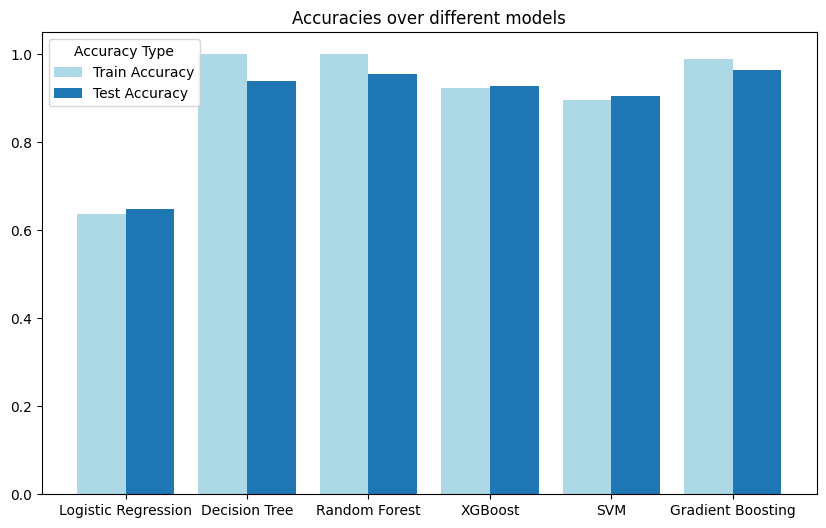

In [66]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Accuracies over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_train = plt.bar(data=results_df, x=bar1, height='Train Accuracy', width=w_bar, color='lightblue')
bars_test = plt.bar(data=results_df, x=bar2, height='Test Accuracy', width=w_bar)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_train, bars_test], title='Accuracy Type', labels=['Train Accuracy', 'Test Accuracy'])
plt.show()

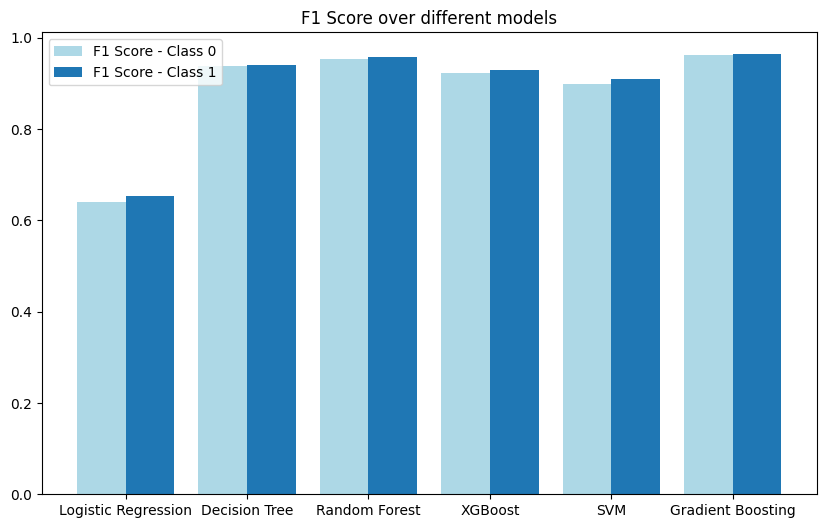

In [67]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('F1 Score over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='F1 Score - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='F1 Score - Class 1', width=w_bar)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['F1 Score - Class 0', 'F1 Score - Class 1'])
plt.show()

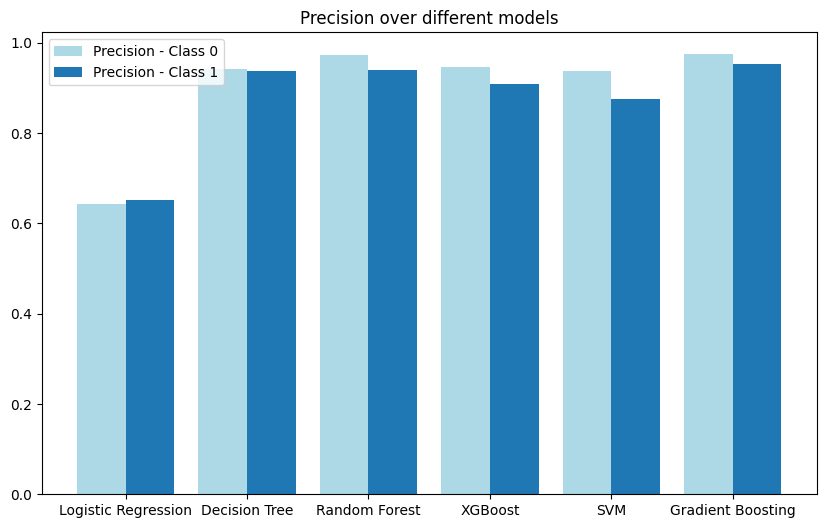

In [68]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Precision over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Precision - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Precision - Class 1', width=w_bar)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['Precision - Class 0', 'Precision - Class 1'])
plt.show()

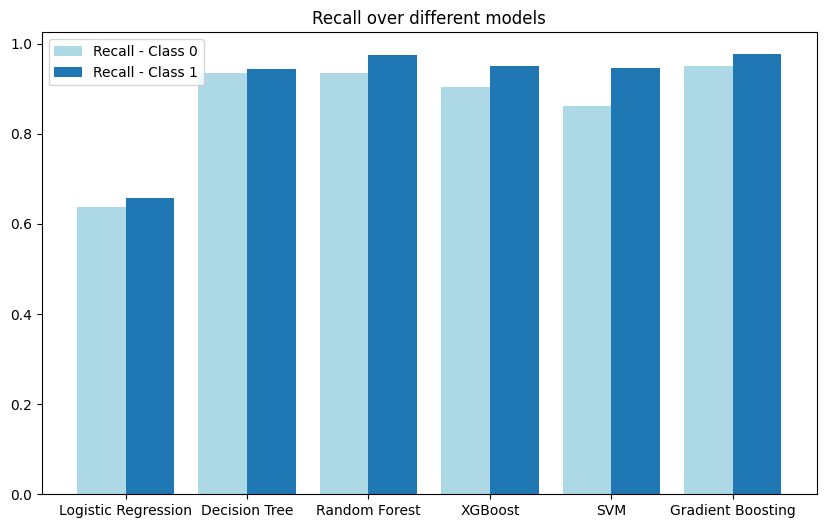

In [69]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Recall over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Recall - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Recall - Class 1', width=w_bar)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['Recall - Class 0', 'Recall - Class 1'])
plt.show()

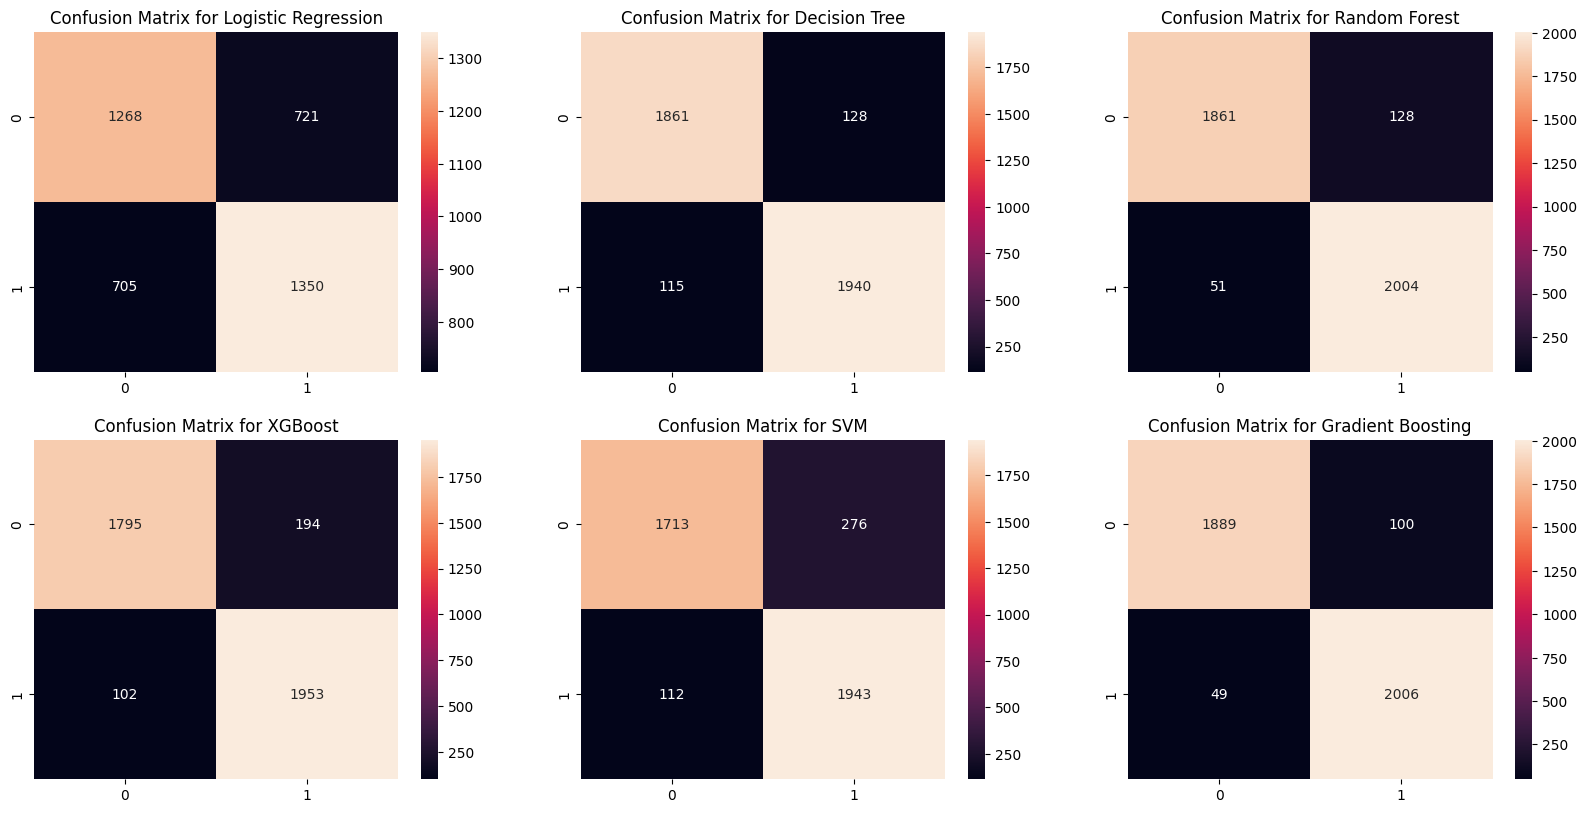

In [70]:
plt.figure(figsize=(20,15))
for i in range(len(cm_list)):
    plt.subplot(3,3,i+1)
    plt.title(f"Confusion Matrix for {models_names[i]}")
    sns.heatmap(cm_list[i], annot=True, fmt='0.0f')
plt.show()

best model is Gradient Boosting

### Classifying Failure Type

In [71]:
X = df2.drop(['failure', 'failure_type'], axis=1)
y_ft = df2['failure_type']

# Step 2: Split dataset into training and testing sets
X_train_ft, X_test_ft, Y_train_ft, Y_test_ft = train_test_split(X, y_ft, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_res_ft, Y_res_ft = smote.fit_resample(X_train_ft, Y_train_ft)

# Step 4: Check class distribution before and after SMOTE
print("Original class distribution:", dict(zip(*np.unique(Y_train_ft, return_counts=True))))
print("Resampled class distribution:", dict(zip(*np.unique(Y_res_ft, return_counts=True))))

Original class distribution: {0: 6740, 1: 63, 2: 65, 3: 80, 4: 33}
Resampled class distribution: {0: 6740, 1: 6740, 2: 6740, 3: 6740, 4: 6740}


In [72]:
X_res_ft.describe()

,type,air_temp,process_temp,rotational_speed,torque,tool_wear
count,33700.000000,33700.000000,33700.000000,33700.000000,33700.000000,33700.000000
mean,0.232077,300.589685,310.208105,1512.984570,46.782292,148.760653
std,0.481533,1.866862,1.243338,332.828071,15.364770,70.471154
min,0.000000,295.300000,305.700000,1192.000000,4.200000,0.000000
25%,0.000000,299.086233,309.372921,1341.000000,36.900000,91.000000
50%,0.000000,300.699372,310.379566,1385.000000,49.536440,174.000000
75%,0.000000,302.231072,311.004558,1523.000000,58.355615,209.000000
max,2.000000,304.500000,313.800000,2874.000000,75.400000,253.000000


In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res_ft[numerical_cols] = scaler.fit_transform(X_res_ft[numerical_cols])

In [74]:
X_res_ft.describe()

,type,air_temp,process_temp,rotational_speed,torque,tool_wear
count,33700.000000,3.370000e+04,3.370000e+04,3.370000e+04,3.370000e+04,3.370000e+04
mean,0.232077,1.149688e-14,2.086170e-14,1.079519e-16,-1.349399e-16,-5.397595e-17
std,0.481533,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,0.000000,-2.833505e+00,-3.625862e+00,-9.644299e-01,-2.771465e+00,-2.110975e+00
25%,0.000000,-8.053484e-01,-6.717373e-01,-5.167446e-01,-6.431882e-01,-8.196476e-01
50%,0.000000,5.875542e-02,1.379058e-01,-3.845423e-01,1.792535e-01,3.581568e-01
75%,0.000000,8.792350e-01,6.405857e-01,3.009235e-02,7.532488e-01,8.548213e-01
max,2.000000,2.094623e+00,2.888955e+00,4.089305e+00,1.862581e+00,1.479199e+00


In [75]:
features_ft = X_res_ft[['process_temp', 'rotational_speed', 'tool_wear']]
target_ft = Y_res_ft

In [76]:
x_train_ft, x_test_ft, y_train_ft, y_test_ft = train_test_split(features_ft, target_ft, test_size=0.3, random_state=0)

In [77]:
x_train_ft.shape, x_test_ft.shape, y_train_ft.shape, y_test_ft.shape

((23590, 3), (10110, 3), (23590,), (10110,))

In [78]:
def model_fit_and_results_ft(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred, average=None),
        'Precision': precision_score(y_test, y_test_pred, average=None),
        'Recall': recall_score(y_test, y_test_pred, average=None)
    }
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

### Results

In [79]:
results_list_ft=[]
cm_list_ft=[]
for i in range(len(models)):
    print(f"Classification Report of {models_names[i]}")
    result, cm = model_fit_and_results_ft(models[i], models_names[i], x_train_ft, x_test_ft, y_train_ft, y_test_ft)
    results_list_ft.append(result)
    cm_list_ft.append(cm)
    print("---------------------------------------------------------------------------------------")

Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      2008
           1       0.57      0.31      0.40      2003
           2       0.71      0.88      0.78      1979
           3       0.65      0.86      0.74      2099
           4       0.83      0.85      0.84      2021

    accuracy                           0.70     10110
   macro avg       0.69      0.70      0.68     10110
weighted avg       0.69      0.70      0.68     10110

---------------------------------------------------------------------------------------
Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2008
           1       0.93      0.96      0.94      2003
           2       0.97      0.96      0.97      1979
           3       0.97      0.98      0.97      2099
           4       0.97      0.99      0.98      2021

    accuracy 

In [80]:
results_df_ft = pd.DataFrame(results_list_ft)
results_df_ft

,Model,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.698601,0.698022,"[0.6312997347480106, 0.39882697947214074, 0.78...","[0.6753688989784336, 0.574108818011257, 0.7068...","[0.5926294820717132, 0.3055416874687968, 0.877..."
1,Decision Tree,1.000000,0.959050,"[0.9271018542037084, 0.9442525900345337, 0.966...","[0.9460860549507517, 0.9332033154558752, 0.970...","[0.9088645418326693, 0.9555666500249625, 0.963..."
2,Random Forest,1.000000,0.968348,"[0.9410542716177617, 0.9629080118694361, 0.977...","[0.9831795984807379, 0.9539441450269476, 0.965...","[0.9023904382470119, 0.9720419370943585, 0.988..."
3,XGBoost,0.902967,0.897725,"[0.8808683853459973, 0.8431522570772761, 0.909...","[0.9677996422182469, 0.8618352450469239, 0.874...","[0.8082669322709163, 0.8252621068397404, 0.947..."
4,SVM,0.790504,0.793076,"[0.8269794721407624, 0.6828834173835658, 0.790...","[0.8898450946643718, 0.841374269005848, 0.6972...","[0.772410358565737, 0.5746380429355966, 0.9135..."
5,Gradient Boosting,0.988554,0.966370,"[0.9491264131551901, 0.9585414585414586, 0.969...","[0.9803609341825902, 0.9590204897551224, 0.958...","[0.9198207171314741, 0.9580629056415377, 0.981..."


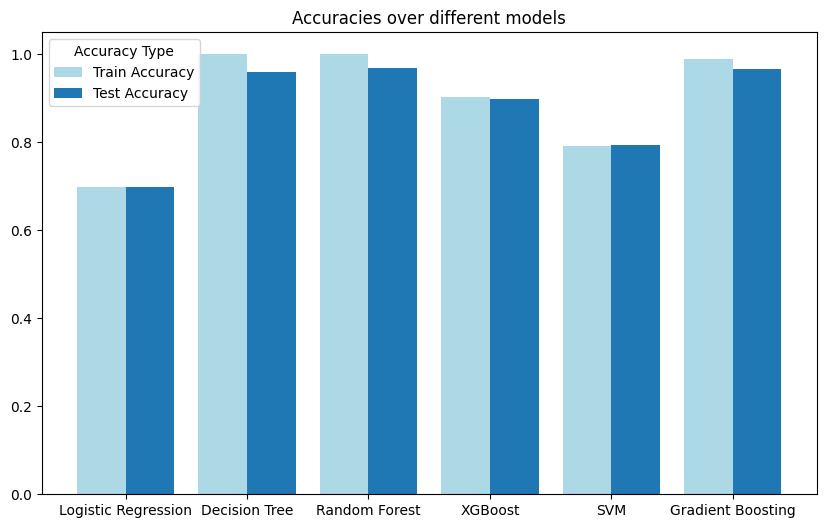

In [81]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Accuracies over different models')
bar1 = np.arange(len(models_names))
bar2 = [i+w_bar for i in bar1]
bars_train = plt.bar(data=results_df_ft, x=bar1, height='Train Accuracy', width=w_bar, color='lightblue')
bars_test = plt.bar(data=results_df_ft, x=bar2, height='Test Accuracy', width=w_bar)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_train, bars_test], title='Accuracy Type', labels=['Train Accuracy', 'Test Accuracy'])
plt.show()

In [82]:
results_df_ft['F1 Score'][0].mean()

0.678918487316966

In [83]:
[score[0] for score in results_df_ft['F1 Score']]

[0.6312997347480106,
 0.9271018542037084,
 0.9410542716177617,
 0.8808683853459973,
 0.8269794721407624,
 0.9491264131551901]

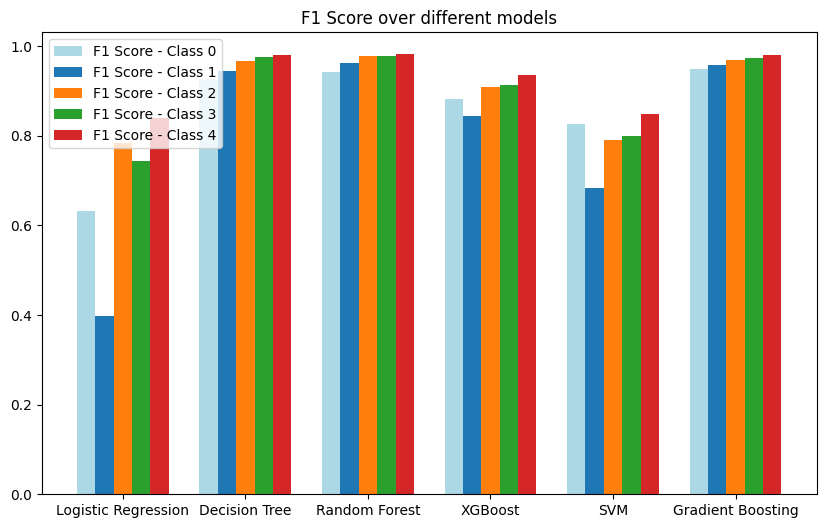

In [84]:
w_bar=0.15
plt.figure(figsize=(10,6))
plt.title('F1 Score over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bar3 = [i+w_bar for i in bar2]
bar4 = [i+w_bar for i in bar3]
bar5 = [i+w_bar for i in bar4]
bars_0 = plt.bar(x=bar1, height=[score[0] for score in results_df_ft['F1 Score']], width=w_bar, color='lightblue')
bars_1 = plt.bar(x=bar2, height=[score[1] for score in results_df_ft['F1 Score']], width=w_bar)
bars_2 = plt.bar(x=bar3, height=[score[2] for score in results_df_ft['F1 Score']], width=w_bar)
bars_3 = plt.bar(x=bar4, height=[score[3] for score in results_df_ft['F1 Score']], width=w_bar)
bars_4 = plt.bar(x=bar5, height=[score[4] for score in results_df_ft['F1 Score']], width=w_bar)
plt.xticks(bar3,models_names)
plt.legend(handles=[bars_0, bars_1, bars_2, bars_3, bars_4], labels=['F1 Score - Class 0', 'F1 Score - Class 1', 'F1 Score - Class 2', 'F1 Score - Class 3', 'F1 Score - Class 4'])
plt.show()

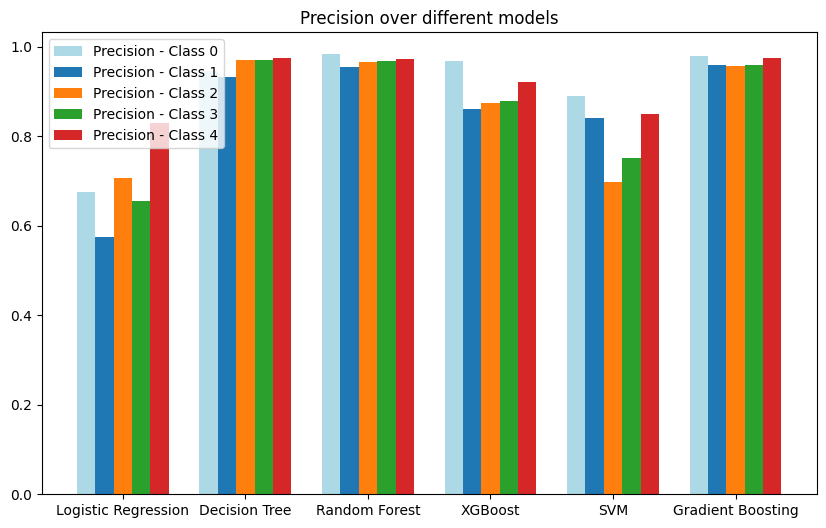

In [85]:
w_bar=0.15
plt.figure(figsize=(10,6))
plt.title('Precision over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bar3 = [i+w_bar for i in bar2]
bar4 = [i+w_bar for i in bar3]
bar5 = [i+w_bar for i in bar4]
bars_0 = plt.bar(x=bar1, height=[score[0] for score in results_df_ft['Precision']], width=w_bar, color='lightblue')
bars_1 = plt.bar(x=bar2, height=[score[1] for score in results_df_ft['Precision']], width=w_bar)
bars_2 = plt.bar(x=bar3, height=[score[2] for score in results_df_ft['Precision']], width=w_bar)
bars_3 = plt.bar(x=bar4, height=[score[3] for score in results_df_ft['Precision']], width=w_bar)
bars_4 = plt.bar(x=bar5, height=[score[4] for score in results_df_ft['Precision']], width=w_bar)
plt.xticks(bar3,models_names)
plt.legend(handles=[bars_0, bars_1, bars_2, bars_3, bars_4], labels=['Precision - Class 0', 'Precision - Class 1', 'Precision - Class 2', 'Precision - Class 3', 'Precision - Class 4'])
plt.show()

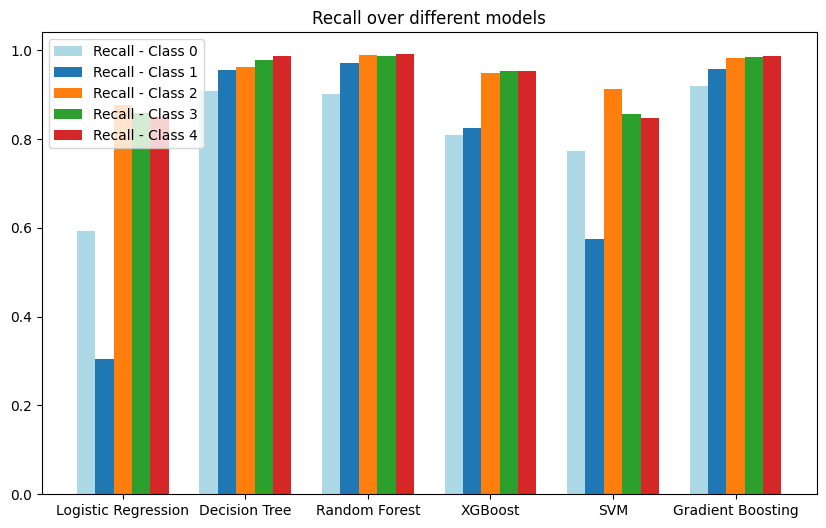

In [86]:
w_bar=0.15
plt.figure(figsize=(10,6))
plt.title('Recall over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bar3 = [i+w_bar for i in bar2]
bar4 = [i+w_bar for i in bar3]
bar5 = [i+w_bar for i in bar4]
bars_0 = plt.bar(x=bar1, height=[score[0] for score in results_df_ft['Recall']], width=w_bar, color='lightblue')
bars_1 = plt.bar(x=bar2, height=[score[1] for score in results_df_ft['Recall']], width=w_bar)
bars_2 = plt.bar(x=bar3, height=[score[2] for score in results_df_ft['Recall']], width=w_bar)
bars_3 = plt.bar(x=bar4, height=[score[3] for score in results_df_ft['Recall']], width=w_bar)
bars_4 = plt.bar(x=bar5, height=[score[4] for score in results_df_ft['Recall']], width=w_bar)
plt.xticks(bar3,models_names)
plt.legend(handles=[bars_0, bars_1, bars_2, bars_3, bars_4], labels=['Recall - Class 0', 'Recall - Class 1', 'Recall - Class 2', 'Recall - Class 3', 'Recall - Class 4'])
plt.show()

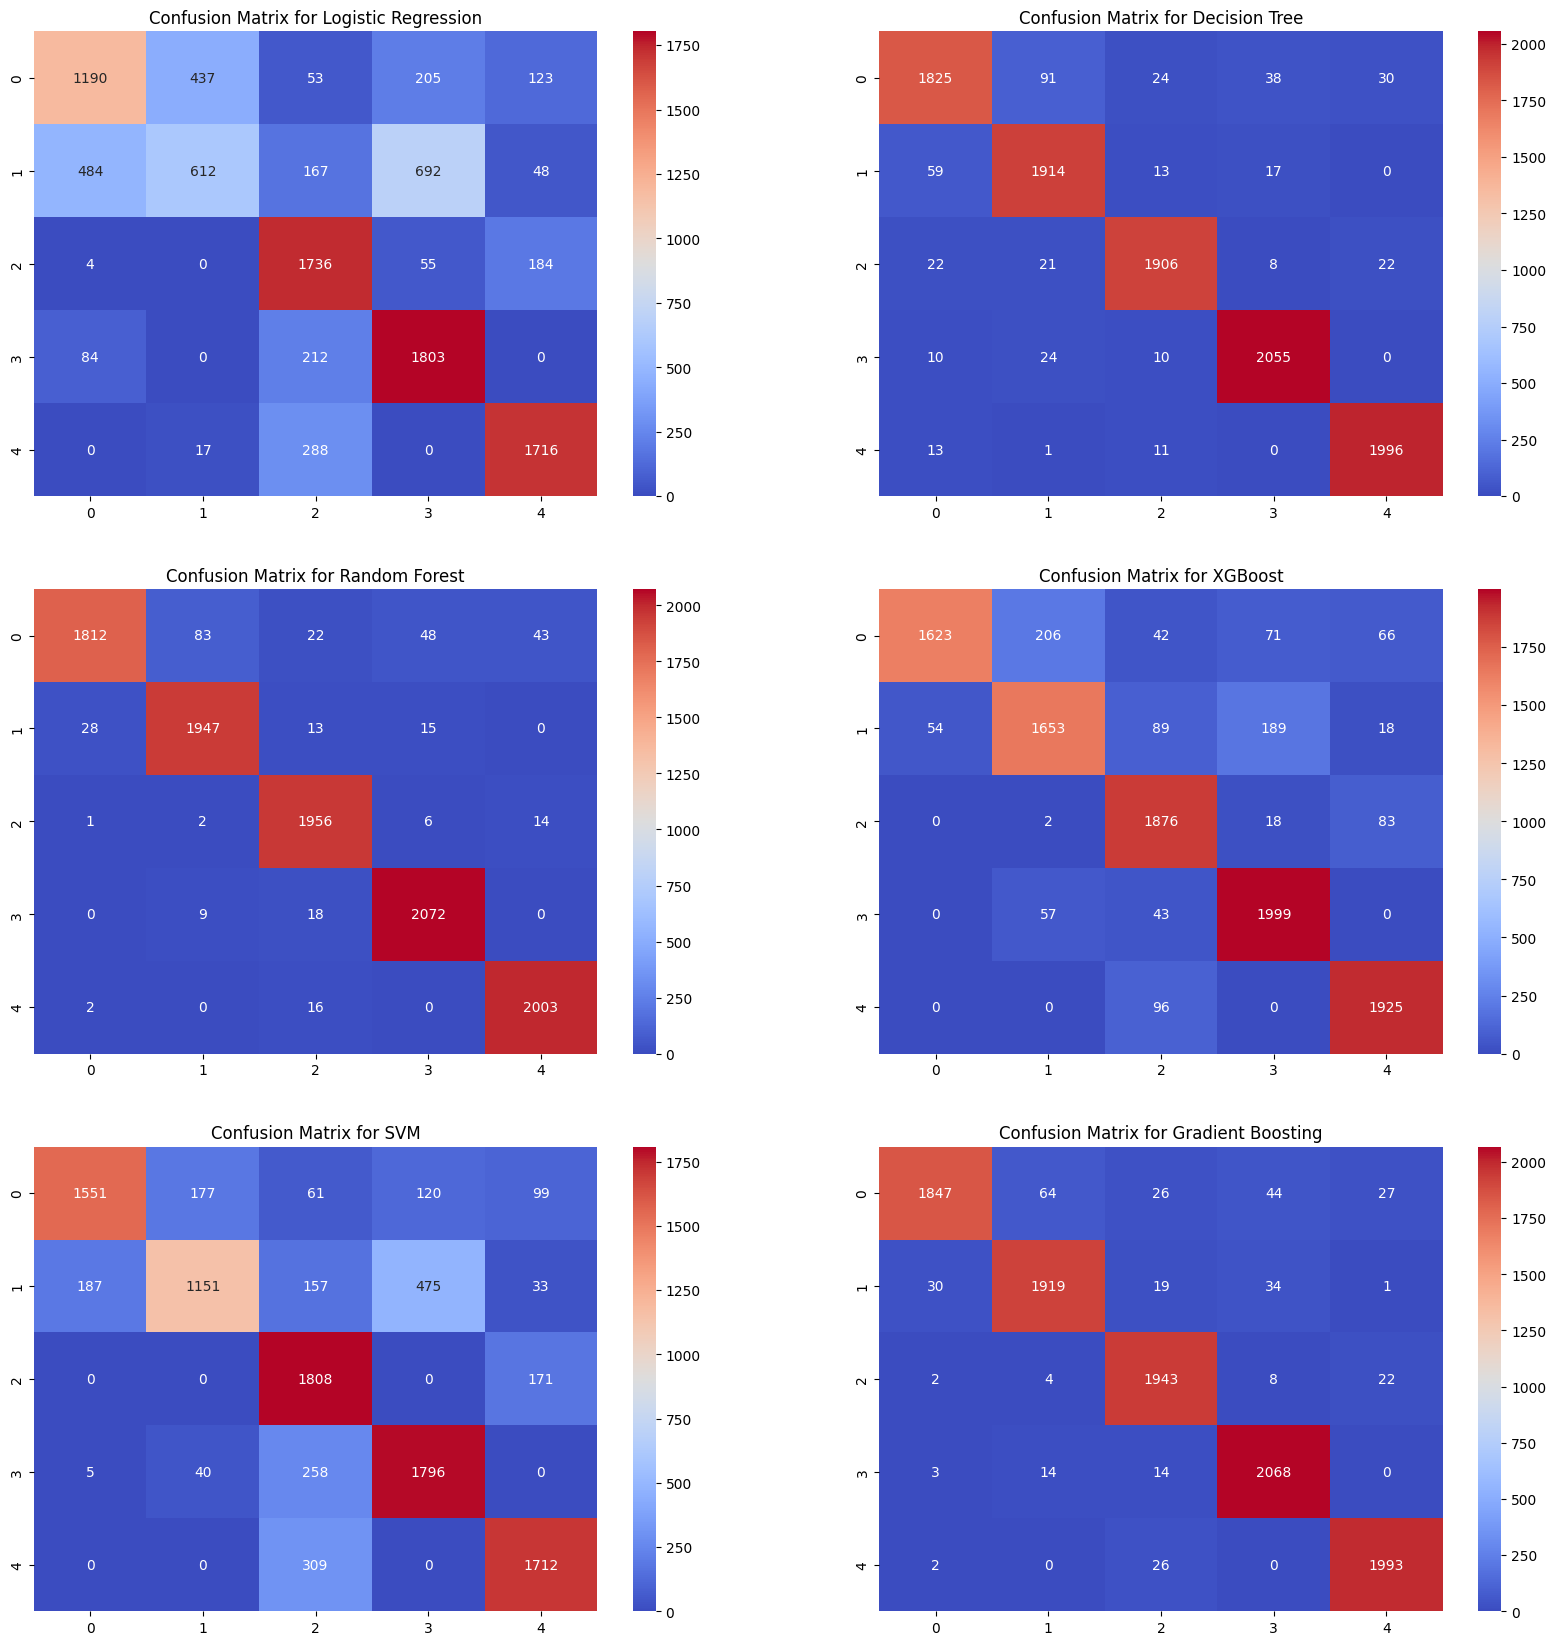

In [87]:
plt.figure(figsize=(20,35))
for i in range(len(cm_list)):
    plt.subplot(5,2,i+1)
    plt.title(f"Confusion Matrix for {models_names[i]}")
    sns.heatmap(cm_list_ft[i], annot=True, fmt='0.0f', cmap='coolwarm')
plt.show()

Both Random Forest and Gradient Boosting did well in this